<a href="https://colab.research.google.com/github/Deepak-Katchi/Clustering-YouTube-videos/blob/master/EDA_and_ML_on_YouTube_trending_videos_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Overview

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
import pickle
import re
warnings.filterwarnings("ignore")

In [0]:
#df=pd.read_csv("data_files/INVideos.csv")

In [0]:
!cp gdrive/'My Drive'/case_study_youtube/USvideos.csv .

In [84]:
!ls

deduplicated_data.pickle  gdrive  sample_data  USvideos.csv


In [0]:
df=pd.read_csv("USvideos.csv")

In [86]:
print(df.shape)

(40949, 16)


In [87]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


**Observation**

The dataset contains 40949 data points each with 16 features.

Let's analyze each column

In [88]:
(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

**Observation**

The dataset contains columns video_id,trending_date and so on which are self explanatory

# **Filling NaN values**

In [89]:
df.columns[df.isna().any()]

Index(['description'], dtype='object')

Dataframe has NaN values only in the description column. Lets replace NaN with empty string 

In [0]:
df.fillna(" ",inplace=True)

# **De Duplication**

In [91]:
print("Number of duplicate rows : ",list(df.duplicated()).count(True))

Number of duplicate rows :  48


In [92]:
print(48/df.shape[0])

0.0011721897970646414


**Observation**

Number of duplicate rows : 48 out of 40949 i.e., 0.11% data

In [0]:
df=df.drop_duplicates()

In [94]:
print(df.shape)

(40901, 16)


In [95]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Exploratory Data Analysis

In [96]:
print("Most viewed video")

Most viewed video


In [97]:
most_viewed=(df[df['views']==df['views'].max()])
print("Most viewed video:")
for i in ['title','views']:
  print("{} : {}".format(i,most_viewed[i].values[0]))

Most viewed video:
title : Childish Gambino - This Is America (Official Video)
views : 225211923


In [98]:
print("Least viewed video")

Least viewed video


In [99]:
df[df['views']==df['views'].min()][["title","description","views","trending_date"]]

,title,description,views,trending_date
14335,"1 dead, others injured after Ky. school shooting",Kentucky Gov. Matt Bevin confirmed there was a...,549,18.26.01


Mean of views: 2360678.0387276593
Let us look at the plot of videos vs views


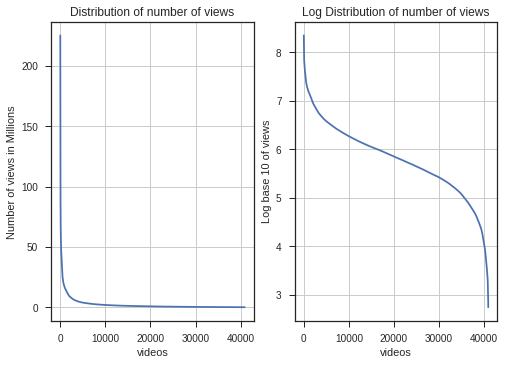

In [100]:
print("Mean of views:",df['views'].mean())
desc_view_counts=df.sort_values(by=['views'],ascending=False)['views']
print("Let us look at the plot of videos vs views")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_view_counts)/1000000)
plt.title("Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of views in Millions")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_view_counts))
plt.title("Log Distribution of number of views")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Log base 10 of views")

plt.show()

**Observation**

In [101]:
print("Most liked video")

Most liked video


In [102]:
df[df['likes']==df['likes'].max()][["title","description","likes","views","trending_date"]]

,title,description,likes,views,trending_date
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,5613827,123010920,18.01.06


In [103]:
print("Least liked video")

Least liked video


In [104]:
df[df['likes']==df['likes'].min()][["title","description","likes","views","trending_date"]].head(2)

,title,description,likes,views,trending_date
192,Apple Clips sample,Clips 2.0 lets you use augmented reality and s...,0,2259,17.14.11
1435,Breaking Bad's Bryan Cranston on Meeting Charl...,The Hudson Union www.hudsonunionsociety.com is...,0,15058,17.21.11


Mean of likes: 74271.7342852253
Let us look at the plot of videos vs likes


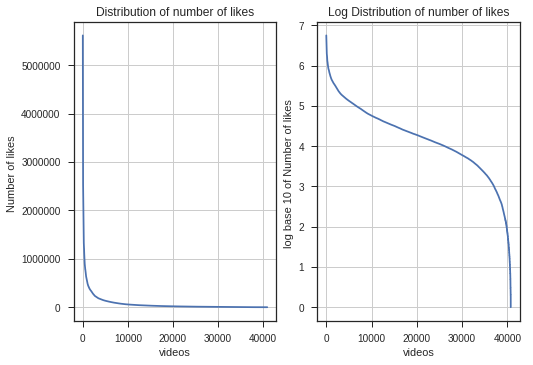

In [105]:
print("Mean of likes:",df['likes'].mean())
desc_likes_counts=df.sort_values(by=['likes'],ascending=False)['likes']
print("Let us look at the plot of videos vs likes")
plt.subplot(1,2,1)
plt.plot(range(1,df.shape[0]+1),(desc_likes_counts))
plt.title("Distribution of number of likes")
plt.grid()
plt.xlabel("videos")
plt.ylabel("Number of likes ")

plt.subplot(1,2,2)
plt.plot(range(1,df.shape[0]+1),np.log10(desc_likes_counts))
plt.title("Log Distribution of number of likes")
plt.grid()
plt.xlabel("videos")
plt.ylabel("log base 10 of Number of likes ")
plt.show()

## Bi Variate Analysis

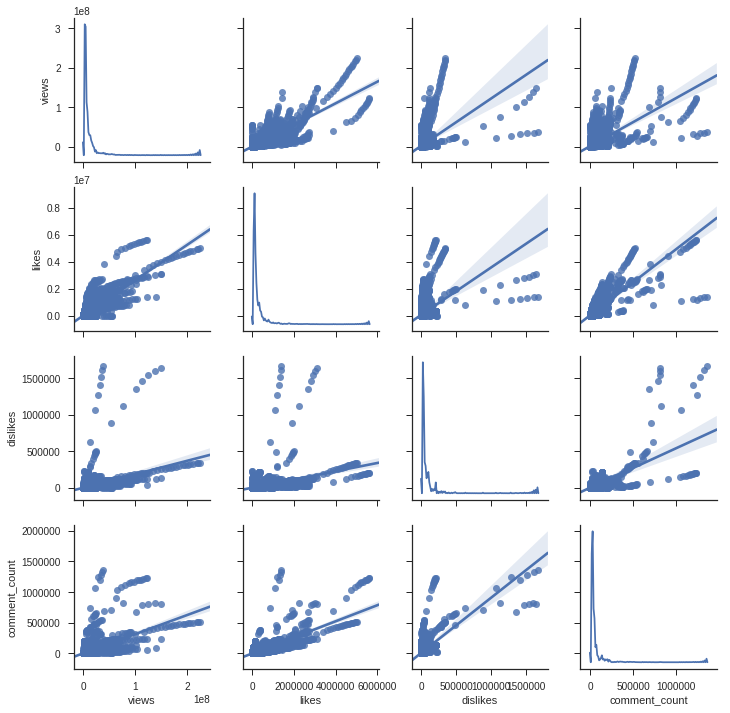

In [106]:
sns.set(style="ticks", color_codes=True)
data = df[['views','likes','dislikes','comment_count']]
g = sns.pairplot(data,diag_kind="kde",kind='reg')

**Observation**



In [0]:
corr_mat=df[['views','likes','dislikes','comment_count']].corr()

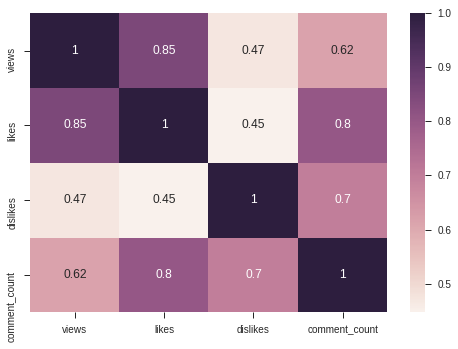

In [108]:
sns.heatmap(corr_mat,annot=True,robust =True)

## Trending Youtube Channel

In [109]:
unq_chn_count=len(list(df['channel_title'].unique()))
print(unq_chn_count)

2207


Of the entire dataset there are 1426 unique youtube channels

In [110]:
len(list(df['channel_title'].value_counts()))

2207

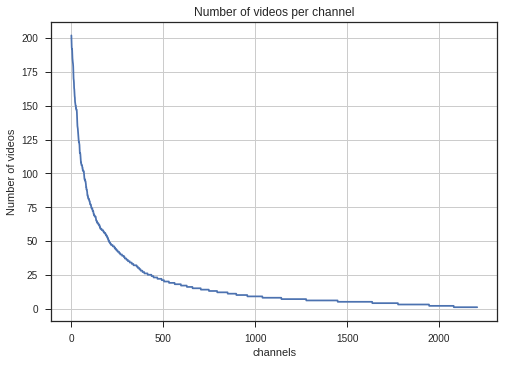

In [111]:
plt.plot(range(1,unq_chn_count+1),list(df['channel_title'].value_counts()))
plt.title("Number of videos per channel")
plt.grid()
plt.xlabel("channels")
plt.ylabel("Number of videos")
plt.show()

In [112]:
print("Top 10 Channels with more videos in trending\n\nChannel\t\t\tVideos count\n\n",df['channel_title'].value_counts()[0:10])

Top 10 Channels with more videos in trending

Channel			Videos count

 ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
TheEllenShow                              192
Vox                                       192
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         185
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: channel_title, dtype: int64


## No of days in trending

In [113]:
print(len(df['title'].unique()))

6455


Out of 40941 rows there are 6455 (15.7%) unique titles. This means that there are many videos listed in trending for more than one day. Lets figure out the numbers in detail

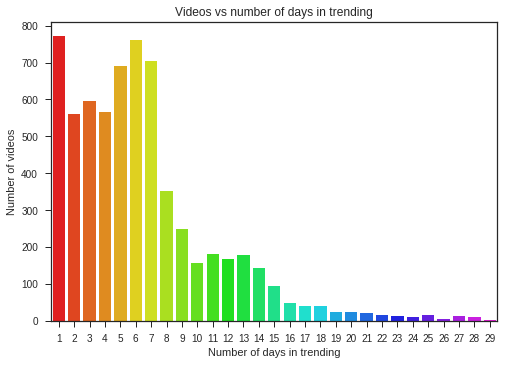

In [114]:
sns.countplot(df['title'].value_counts(), palette='gist_rainbow')
plt.title("Videos vs number of days in trending")
plt.ylabel("Number of videos")
plt.xlabel("Number of days in trending")
plt.show()

In [115]:
print("Videos trending for many days\t\t\t\t\t\t\tNumber of days in trending\n\n",df['title'].value_counts()[0:10])

Videos trending for many days							Number of days in trending

 Sam Smith - Pray (Official Video) ft. Logic                                     29
WE MADE OUR MOM CRY...HER DREAM CAME TRUE!                                      29
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures    29
Why I'm So Scared (being myself and crying too much)                            28
Rooster Teeth Animated Adventures - Millie So Serious                           28
Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX                      28
Selena Gomez - Back To You (Lyric Video)                                        28
Charlie Puth - BOY [Official Audio]                                             28
The Deadliest Being on Planet Earth – The Bacteriophage                         28
YoungBoy Never Broke Again Goes Sneaker Shopping With Complex                   28
Name: title, dtype: int64


## Number of days to reach trending

In [116]:
print()  #format=%Y-%M-%DT%H:%M:%S.000Z

In [0]:
df['days_publish_to_trending']=((pd.to_datetime(df['trending_date'].map(lambda x : '20'+x),format='%Y.%d.%m')) - pd.to_datetime(df['publish_time'].map(lambda x : x[0:10]),format='%Y-%m-%d')).map(lambda x:x.days)

In [0]:
df_unique_titles=df

In [119]:
df_unique_titles.drop_duplicates(subset=['title','publish_time'], keep='first', inplace=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_publish_to_trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,1
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,2
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",1
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",1


In [120]:
df_unique_titles.shape

(40901, 17)

In [121]:
len(list(df_unique_titles['title'].unique()))

6455

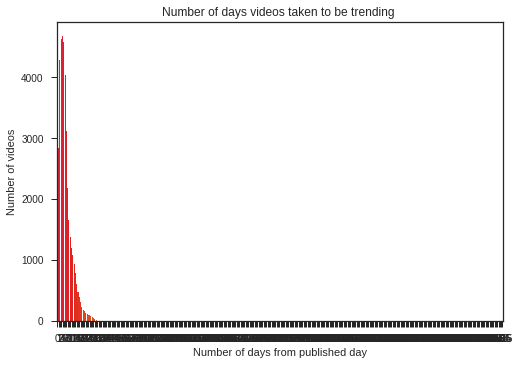

In [122]:
sns.countplot(df['days_publish_to_trending'], palette='gist_rainbow')
plt.title("Number of days videos taken to be trending ")
plt.ylabel("Number of videos")
plt.xlabel("Number of days from published day")
plt.show()

In [123]:
print("Videos trending on the day of publishing\n\n",df[df['days_publish_to_trending']==0][['title','views']].head(10))

Videos trending on the day of publishing

                                                   title   views
215   American Crime Story Season 2: The Assassinati...   14565
216   The Making of a Song: “Delicate” – watch more ...  125645
241      Taylor Swift Instagram Story - Target 11/14/17    3006
608           Luis Fonsi, Demi Lovato - Échame La Culpa  499946
632   Jaylen Brown delivers emotional press conferen...    5938
1006                      Chance-giving Monologue - SNL   21046
1201              A Wrinkle in Time Official US Trailer  165139
1208  Lady Gaga - The Cure (Live at AMA's from Joann...   18916
1210                     P!nk presentation on AMAs 2017   19744
1613  The Voice 2017 - Pitch Perfect 3 x The Voice F...   59462


## Category ID

In [124]:
unq_cat_ids_cnt=len(list(df['category_id'].unique()))
print(unq_cat_ids_cnt)

16


All the 33k odd videos are categorised into a total of 17 categories

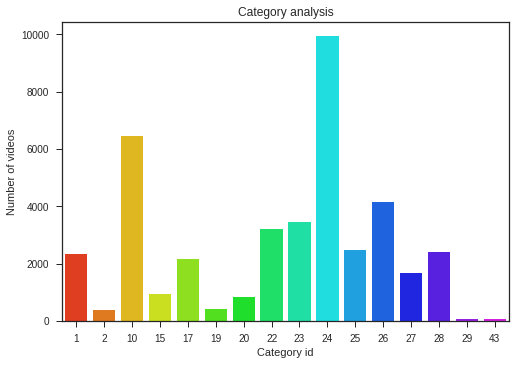

In [125]:
sns.countplot(df['category_id'], palette='gist_rainbow')
plt.title("Category analysis")
plt.ylabel("Number of videos")
plt.xlabel("Category id")
plt.show()

In [126]:
print(df['category_id'].value_counts())

24    9944
10    6467
26    4142
23    3453
22    3208
25    2485
28    2397
1     2343
17    2172
27    1655
15     920
20     816
19     401
2      384
29      57
43      57
Name: category_id, dtype: int64


In [127]:
df.shape

(40901, 17)

# Storing de duplicated data

In [129]:
df.shape

(40901, 17)

In [0]:
df=df.sort_values(by=['publish_time','trending_date'])

In [0]:
pickle_out = open("deduplicated_data.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()

# Pre Processing

In [0]:
def text_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(": "," ").replace("-"," ").replace(" :"," ")
    data=re.sub(r' +',' ',data).lower()
    return data
def channel_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(":","").replace("-","")
    data=re.sub(r' ','',data).lower()
    return data

In [131]:
df.shape

(40901, 17)

In [0]:
df_1=df
df_1['channel_title']=df_1['channel_title'].map(lambda x : channel_preprocess(x))
df_1["Text_Feature"]=df_1.title+" "+df_1.tags+" "+df_1.tags+" "+df_1.tags+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.channel_title+" "+df_1.description
#df_1=df_1.drop(columns=['title','channel_title','tags','description','video_id','comments_disabled', 'ratings_disabled','thumbnail_link', 'video_error_or_removed'])

In [0]:
df_1['Text_Feature']=df_1['Text_Feature'].map(lambda x : text_preprocess(x))

In [0]:
df_1.columns

In [0]:
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from datetime import datetime

# Train and Test Data Split in 70:30

In [135]:
df_1.shape

(40901, 18)

In [136]:
int(40901*0.7)

28630

In [0]:
x_train=df_1['Text_Feature'][0:int(40901*0.7)]

In [0]:
x_test=df_1['Text_Feature'][int(40901*0.7):]

In [0]:
y_train=df['category_id'][0:int(40901*0.7)]
y_test=df['category_id'][int(40901*0.7):]

In [140]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(28630,) (28630,)
(12271,) (12271,)


In [141]:
df_1.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'days_publish_to_trending',
       'Text_Feature'],
      dtype='object')

# Vectorising using Word2Vec

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle


# Train your own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train.values:
    list_of_sent.append(sent.split())

In [0]:
test_list_of_sent=[]
for sent in x_test.values:
    test_list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [145]:
print(w2v_model)

Word2Vec(vocab=40462, size=50, alpha=0.025)


In [0]:
w2v_words = list(w2v_model.wv.vocab)

In [147]:
len(w2v_words)

40462

In [148]:
w2v_model.wv.most_similar('music')

[('lyrics', 0.6129063367843628),
 ('audio', 0.5814149975776672),
 ('whydontwe', 0.5604420304298401),
 ('rap', 0.5559992790222168),
 ('aria', 0.5519511103630066),
 ('milburn', 0.5496358871459961),
 ('youtube.com', 0.5489402413368225),
 ('electronicas', 0.5475653409957886),
 ('electronique', 0.5328053832054138),
 ('songs', 0.5322948694229126)]

In [0]:
from tqdm import tqdm

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def avgw2v(list_of_sent):
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_of_sent): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [151]:
sent_vect=avgw2v(list_of_sent)

100%|██████████| 28630/28630 [12:49<00:00, 37.20it/s]

28630
50


In [152]:
test_sent_vect=avgw2v(test_list_of_sent)

100%|██████████| 12271/12271 [08:10<00:00, 25.01it/s]

12271
50


In [0]:
std = StandardScaler()
std.fit(sent_vect)
train_w2v=std.transform(sent_vect)
test_w2v=std.transform(test_sent_vect)


In [0]:
pickle_out = open("train_w2v.pickle","wb")
pickle.dump(train_w2v, pickle_out)
pickle_out.close()

In [0]:
pickle_out = open("test_w2v.pickle","wb")
pickle.dump(test_w2v, pickle_out)
pickle_out.close()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Vectorising Using TF Vectorizer

In [0]:
tfidf_vect = TfidfVectorizer(max_features=200000, ngram_range=(1,3))
tfidf_train_data = tfidf_vect.fit_transform(x_train.values)
tfidf_test_data = tfidf_vect.transform(x_test.values)


In [158]:
stdscaler=StandardScaler(with_mean = False)
tfidf_train_data = stdscaler.fit_transform(tfidf_train_data)
tfidf_test_data = stdscaler.transform(tfidf_test_data)
print(tfidf_train_data.shape)
print(tfidf_test_data.shape)

(28630, 200000)
(12271, 200000)


# ML Models

In [0]:
def perform_cv(model,parameters,x_train,y_train,x_test,y_test):
    #3 fold cv using time series split
    tscv=TimeSeriesSplit(n_splits=5)
    cv_model = GridSearchCV(model, param_grid=parameters, cv=tscv, verbose=1, n_jobs=-1,scoring='f1_micro')
    cv_model.fit(x_train,y_train)
    results={}
    results['model']=cv_model
    
    results['best_estimator']=cv_model.best_estimator_
    print('\nBest Estimator \n',cv_model.best_estimator_)
    
    results['best_params']=cv_model.best_params_
    print('\nBest Parameters:\n',cv_model.best_params_)
    
    results['best_score']=cv_model.best_score_
    print('\nBest F1 micro Cross Validation score : \n',cv_model.best_score_)
    
    y_pred = cv_model.predict(x_test)
    results['predict']=y_pred
    
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy']=accuracy
    print("\nTest accuracy : ",accuracy)
    
    f1_micro = metrics.f1_score(y_true=y_test, y_pred=y_pred,average='micro')
    results['f1_micro']=f1_micro
    print("\nTest F1 micro score : ",f1_micro)
    return results
    
    
    
    

## Model 1 Logistic Regression

### Using TFIDF Vectorised Data

In [166]:

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
model=LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.0min finished



Best Estimator 
 LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 0.01}

Best F1 micro Cross Validation score : 
 0.7739258017187173

Test accuracy :  0.8451633933664738

Test F1 micro score :  0.8451633933664738


### Using Avg W2V Data

In [167]:

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
model=LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
w2v_log_reg_cv_results =  perform_cv(model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished



Best Estimator 
 LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Best Parameters:
 {'C': 1}

Best F1 micro Cross Validation score : 
 0.6032278348354643

Test accuracy :  0.6400456360524814

Test F1 micro score :  0.6400456360524814


## Model 2 Decision Trees

### Using TFIDF Vectorised Data

In [0]:
parameters = {'max_depth':np.arange(3,50,2),'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[2,3,4,5] }
dt_model = DecisionTreeClassifier(class_weight ='balanced')
w2v_dt_results=perform_cv(dt_model,parameters, tfidf_train_data, y_train, tfidf_test_data, y_test)

###  Using Avg W2V Data

In [161]:
parameters = {'max_depth':np.arange(3,50,2),'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[2,3,4,5] }
dt_model = DecisionTreeClassifier(class_weight ='balanced')
w2v_dt_results=perform_cv(dt_model,parameters, train_w2v, y_train, test_w2v, y_test)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 20.5min finished



Best Estimator 
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=35, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Best Parameters:
 {'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 4}

Best F1 micro Cross Validation score : 
 0.49322993083211064

Test accuracy :  0.525466547143672

Test F1 micro score :  0.525466547143672


# Clustering

In [0]:
from sklearn.metrics import silhouette_score

In [0]:
def k_means(data,cluster_range):
  models=[]
  score=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
    #score.append(silhouette_score(data,kmeans.labels_))
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [0]:
from collections import Counter

In [0]:
def cluster_analysis(train_data,k):
  
  
  #For each cluster
  for i in range(0,k):
    
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
   

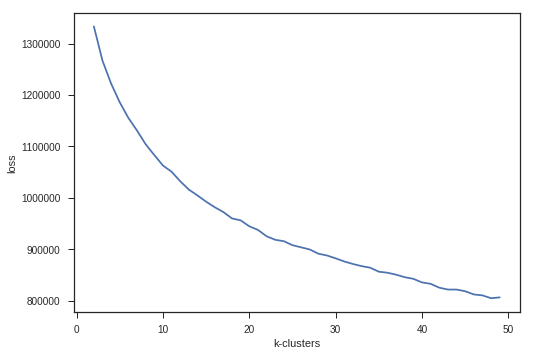

In [168]:
model_list=k_means(train_w2v,range(2,50))

In [0]:
df_2=df_1.head(len(x_train))

In [0]:
df_2['labels']=model_list[18].labels_

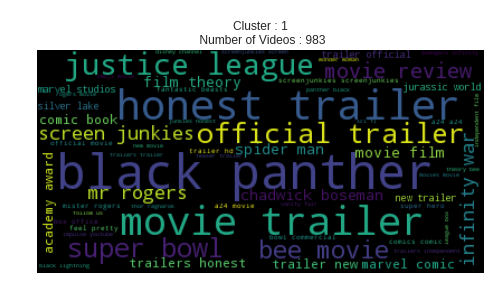

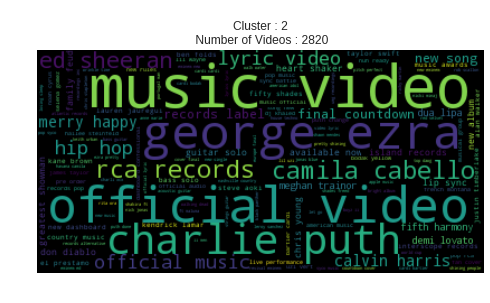

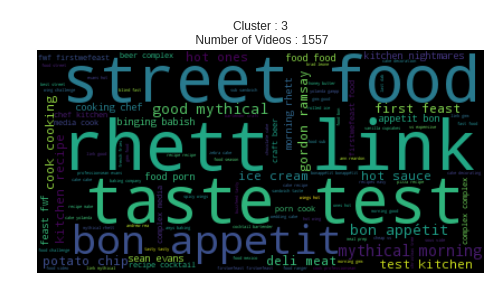

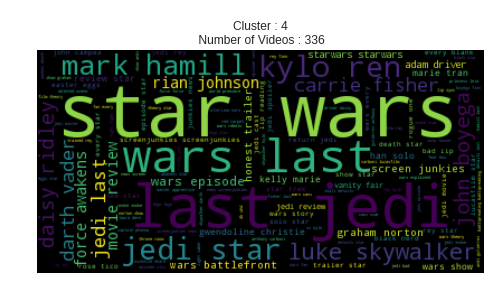

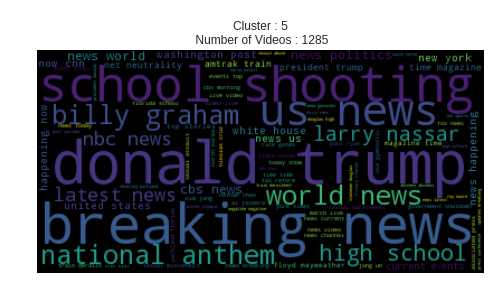

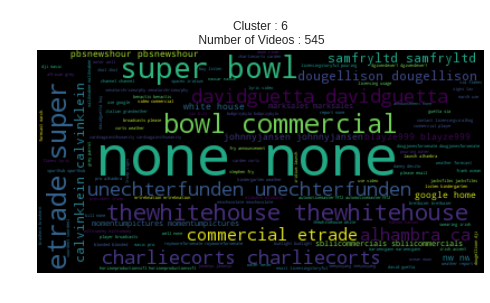

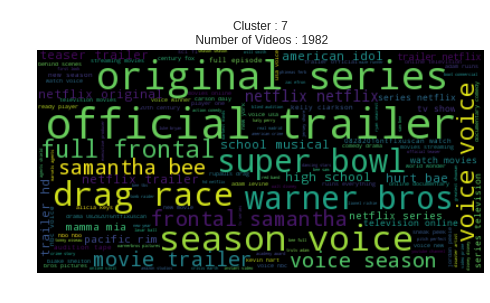

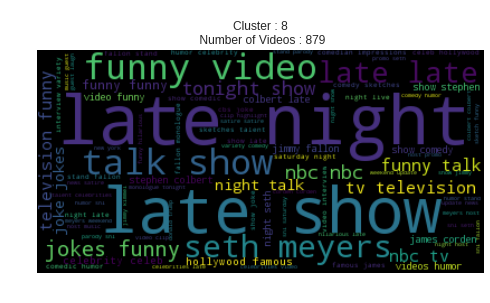

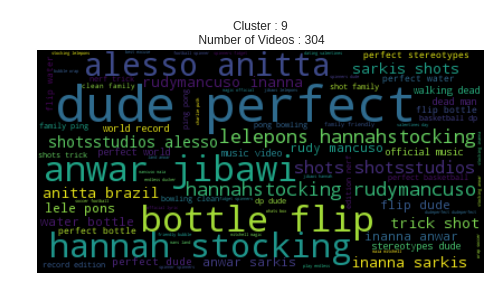

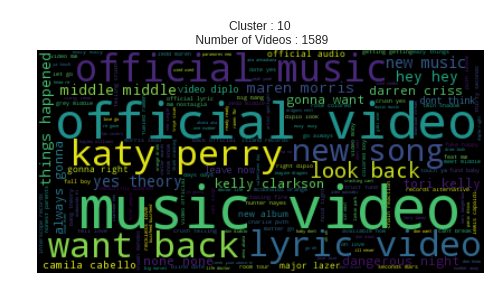

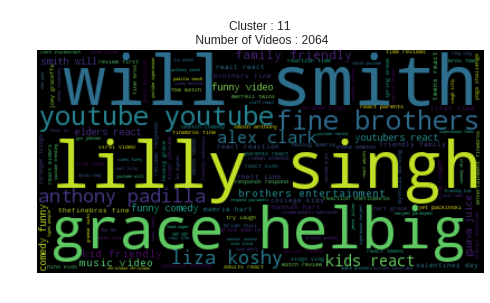

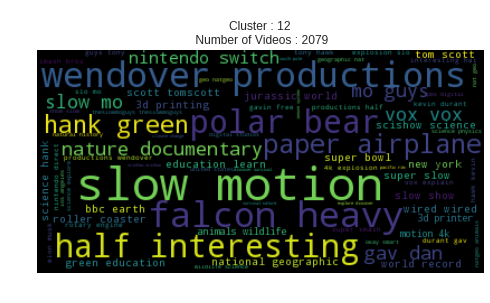

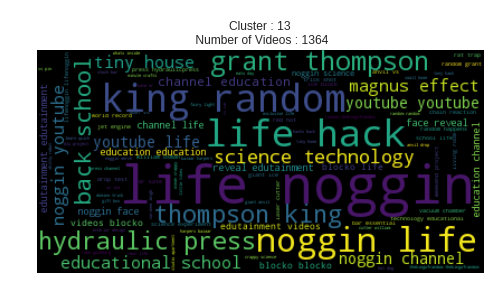

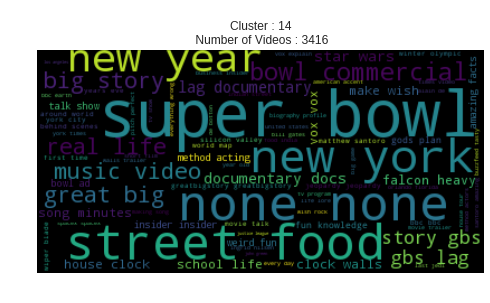

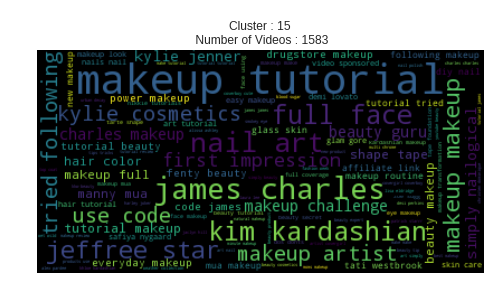

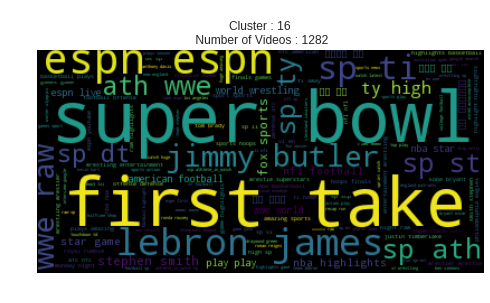

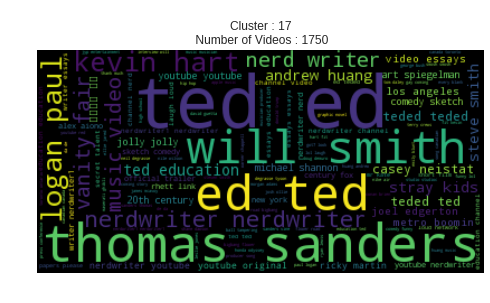

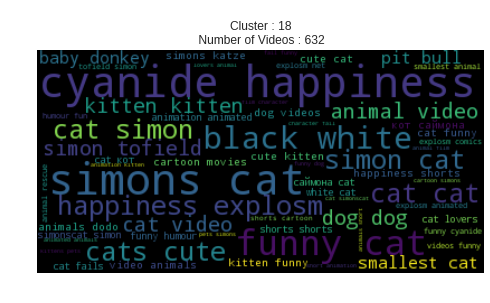

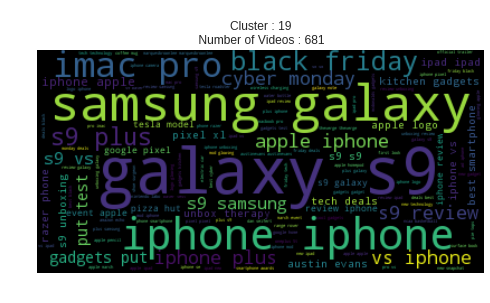

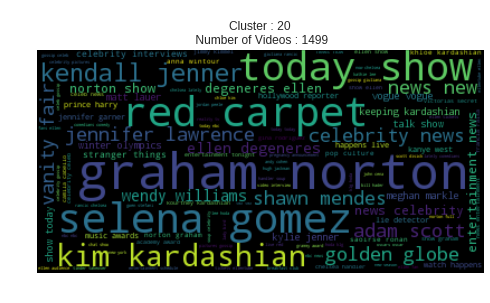

In [175]:
cluster_analysis(df_2,20)

# Saving DataFrame with cluster labels

In [0]:
pickle_out = open("final_clustered_dataframe.pickle","wb")
pickle.dump(df_2, pickle_out)
pickle_out.close()

In [0]:
#from google.colab import files
#files.download("final_clustered_dataframe.pickle")